# Creación del dataset

In [52]:
# !pip install -U kaleido
# !pip install plotly
# !pip install cluster
# !pip install yellowbrick
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn import cluster
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans




Convertimos el raw_dataset en un pandas dataframe con el formato que nos interesa

In [53]:
data1920 = pd.read_excel('data/raw_dataset.xlsx', sheet_name='Applied Computing', index_col=None, na_values=['No terminado'], usecols = "A:D", skiprows=1)
data1920.dropna(how='all', inplace=True)
data1920.insert(loc=0, column = 'Curso', value = '19/20')
data1920.head()

Curso      #      Id  Score                    Date
0  19/20  838.0  3175.0    8.5  2020-03-30 18:35:15+02
1  19/20  837.0  3209.0    7.5  2020-03-30 17:16:20+02
2  19/20  836.0  3229.0    8.5  2020-03-30 11:23:42+02
3  19/20  835.0  3229.0    NaN  2020-03-30 10:48:41+02
4  19/20  834.0  3229.0    NaN  2020-03-30 10:47:22+02

In [54]:
data1819 = pd.read_excel('data/raw_dataset.xlsx', sheet_name='Applied Computing', index_col=None, na_values=['No terminado'], usecols = "E:H", skiprows=19)
data1819.dropna(how='all', inplace=True)
data1819.insert(loc=0, column = 'Curso', value = '18/19')
data1819.head()

Curso       #      Id  Score                    Date
0  18/19  1175.0  3021.0    9.0  2019-05-21 20:10:52+02
1  18/19  1174.0  2865.0    5.5  2019-05-21 15:35:20+02
2  18/19  1173.0  2851.0    9.0  2019-05-21 15:33:15+02
3  18/19  1172.0  2821.0    6.0  2019-05-21 13:38:42+02
4  18/19  1171.0  2736.0    5.5  2019-05-21 13:37:20+02

In [55]:
data1718 = pd.read_excel('data/raw_dataset.xlsx', sheet_name='Applied Computing', index_col=None, na_values=['No terminado'], usecols = "I:L", skiprows=69)
data1718.dropna(how='all', inplace=True)
data1718.insert(loc=0, column = 'Curso', value = '17/18')
data1718.head()

Curso     #    Id  Score                    Date
0  17/18  1345  2311    8.0  2018-06-01 15:03:04+02
1  17/18  1344  2308    8.0  2018-06-01 15:01:31+02
2  17/18  1343  2276    9.5  2018-06-01 14:51:46+02
3  17/18  1342  2276    8.5  2018-06-01 14:07:59+02
4  17/18  1341  2300    6.0  2018-06-01 14:06:12+02

In [56]:
dataComputing = pd.concat([data1718, data1819, data1920], ignore_index=True)
dataComputing.columns = ['CURSO', 'SEQ', 'ID', 'SCORE', 'DATE']
dataComputing['DATE'] = pd.to_datetime(dataComputing.DATE)
dataComputing.head()

CURSO     SEQ      ID  SCORE                       DATE
0  17/18  1345.0  2311.0    8.0  2018-06-01 15:03:04+02:00
1  17/18  1344.0  2308.0    8.0  2018-06-01 15:01:31+02:00
2  17/18  1343.0  2276.0    9.5  2018-06-01 14:51:46+02:00
3  17/18  1342.0  2276.0    8.5  2018-06-01 14:07:59+02:00
4  17/18  1341.0  2300.0    6.0  2018-06-01 14:06:12+02:00

In [57]:
max_dates = {curso: max(dataComputing[dataComputing.CURSO == curso].DATE) for curso in dataComputing.CURSO.unique()}
max_dates

{'17/18': datetime.datetime(2018, 6, 1, 15, 3, 4, tzinfo=tzoffset(None, 7200)),
 '18/19': datetime.datetime(2019, 5, 21, 20, 10, 52, tzinfo=tzoffset(None, 7200)),
 '19/20': datetime.datetime(2020, 3, 30, 18, 35, 15, tzinfo=tzoffset(None, 7200))}

In [58]:
dataComputing['DUF'] = [(max_dates[curso]-fecha).days for curso, fecha in dataComputing[['CURSO', 'DATE']].values]

In [59]:
dataComputing.head()

CURSO     SEQ      ID  SCORE                       DATE  DUF
0  17/18  1345.0  2311.0    8.0  2018-06-01 15:03:04+02:00    0
1  17/18  1344.0  2308.0    8.0  2018-06-01 15:01:31+02:00    0
2  17/18  1343.0  2276.0    9.5  2018-06-01 14:51:46+02:00    0
3  17/18  1342.0  2276.0    8.5  2018-06-01 14:07:59+02:00    0
4  17/18  1341.0  2300.0    6.0  2018-06-01 14:06:12+02:00    0

Así llegamos a un DataFrame cuyas columnas son las siguientes:
- **CURSO**: identificación del curso. Sus valores son: '17/18', '18/19', '19/20'
- **SEQ**: identificador del examen dentro del curso. Este número se puede encontrar repetido para distintos cursos.
- **ID**: identificador del alumno. Un alumno se puede encontrar en distintos cursos a la vez.
- **SCORE**: puntuación de un SEQ para un ID, es decir, es la puntuación obtenida de un alumno para un examen.
- **DATE**: fecha del examen.
- **DUF**: días hasta el último examen realizado de cada curso.

# Desarrollo de test para el dataset

In [60]:
[False for curso in dataComputing.CURSO.unique() if curso not in ['17/18', '18/19', '19/20']]

[]

In [61]:
len([curso for curso in dataComputing.CURSO.unique() if curso not in ['17/18', '18/19', '19/20']])


0

In [62]:
len([nota for nota in dataComputing.SCORE.unique() if (nota>10)|(nota<0) ])

0

In [63]:
len([duf for duf in dataComputing.DUF.unique() if (duf<0) ])

0

In [64]:
# Comprobación de que un alumno puede estar en distintos cursos, por lo que no nos vale como test
alumnos1718 = list(set(dataComputing[dataComputing.CURSO == '17/18'].ID))
alumnos1819 = list(set(dataComputing[dataComputing.CURSO == '18/19'].ID))
alumnos1920 = list(set(dataComputing[dataComputing.CURSO == '19/20'].ID))
for i in alumnos1819:
    if i in alumnos1920:
        print(f"El alumno {i} aparece en el curso 18/19")

El alumno 2.0 aparece en el curso 18/19


In [140]:
data1 = dataComputing.copy(deep=True)
data2 = dataComputing.copy(deep=True)

# Caso 1: agrupación de las notas en las 3 últimas y realizar el clustering

In [65]:
# Eliminamos los "No terminados"
# data1 = dataComputing[pd.isnull(dataComputing.SCORE)==False]
# data1.drop(['SEQ'], axis = 1, inplace = True)

In [66]:
data1.head()

SCORE                       DATE  DUF
ID     CURSO                                           
2213.0 17/18 56     8.0  2018-06-01 11:50:03+02:00    0
             140    6.5  2018-06-01 00:38:06+02:00    0
             188    3.0  2018-05-31 20:31:40+02:00    0
2215.0 17/18 75     8.5  2018-06-01 11:16:11+02:00    0
             135    7.5  2018-06-01 01:42:42+02:00    0

In [67]:
data1 = data1.groupby(['ID', 'CURSO'])['SCORE', 'DATE', 'DUF'].apply(lambda x: x.sort_values(['DATE'], ascending=False).head(3))
data1.head(12)

<ipython-input-67-0b89dec8e77a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data1 = data1.groupby(['ID', 'CURSO'])['SCORE', 'DATE', 'DUF'].apply(lambda x: x.sort_values(['DATE'], ascending=False).head(3))


SCORE                       DATE  DUF
ID     CURSO                                           
2213.0 17/18 56     8.0  2018-06-01 11:50:03+02:00    0
             140    6.5  2018-06-01 00:38:06+02:00    0
             188    3.0  2018-05-31 20:31:40+02:00    0
2215.0 17/18 75     8.5  2018-06-01 11:16:11+02:00    0
             135    7.5  2018-06-01 01:42:42+02:00    0
             182   10.0  2018-05-31 20:37:15+02:00    0
2217.0 17/18 464    6.0  2018-05-30 16:08:59+02:00    1
             478    6.0  2018-05-30 13:06:44+02:00    2
             782    7.0  2018-04-27 17:34:46+02:00   34
2218.0 17/18 53     8.5  2018-06-01 11:57:50+02:00    0
             83     7.5  2018-06-01 10:46:05+02:00    0
             149    8.5  2018-06-01 00:08:35+02:00    0

## Caso 1.1: Solamente considerando los SCORE

In [68]:
# Conseguimos un df tal que cada fila representa un id
dicc = dict()
for id, value in data1.reset_index(drop=False)[['ID', 'SCORE']].values:
    if id in dicc.keys():
        dicc[id] += [value]
    else:
        dicc[id] = [value]

for i in dicc.keys():
    while len(dicc[i]) < 3:
        dicc[i] += [0]

data11 = pd.DataFrame.from_dict(dicc, orient='index', columns=['SCORE1', 'SCORE2', 'SCORE3'])
data11.head()

SCORE1  SCORE2  SCORE3
2213.0     8.0     6.5     3.0
2215.0     8.5     7.5    10.0
2217.0     6.0     6.0     7.0
2218.0     8.5     7.5     8.5
2219.0    10.0    10.0     5.0

In [69]:
data11_test = data11.copy(deep=True)

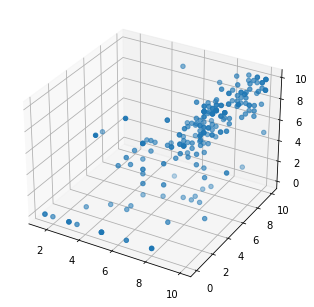

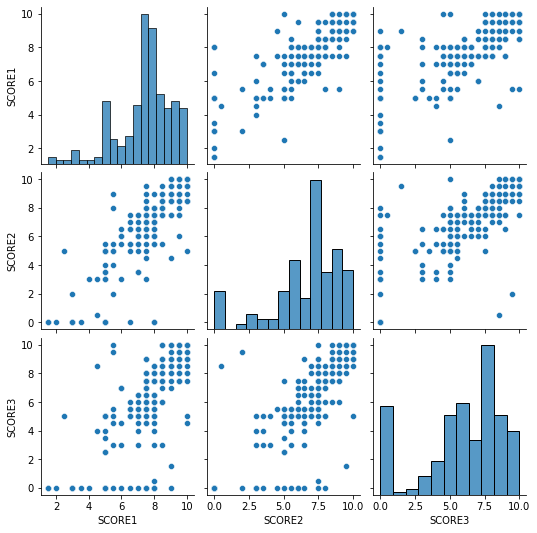

In [70]:
sns_plot11 = sns.pairplot(data11)
sns_plot11.savefig("out/caso1/pairplotCaso11.png")

In [79]:
# Normalizamos los datos
min_max_scaler = preprocessing.MinMaxScaler() 
data11 = min_max_scaler.fit_transform(data11)

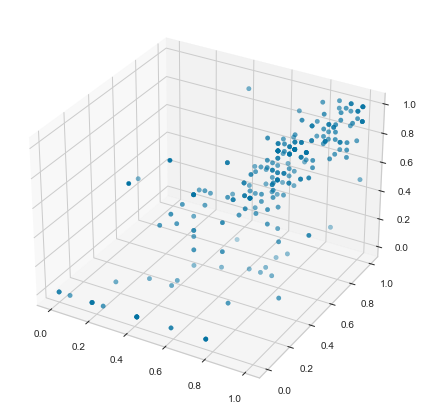

In [78]:
# Gráfico 3D para la dispersión
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data11[:, 0], data11[:, 1], data11[:, 2])

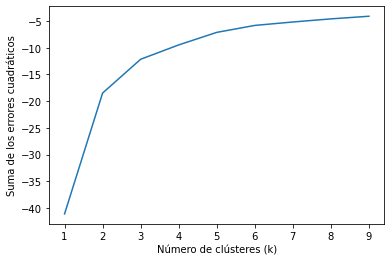

In [72]:
# Utilizando la suma de errores cuadráticos, extraemos el número de clusters
nc = range(1, 10)
kmeans = [cluster.KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(data11).score(data11) for i in range(len(kmeans))]

plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.savefig("out/caso1/codo2Caso1.png")
plt.plot(nc,score)

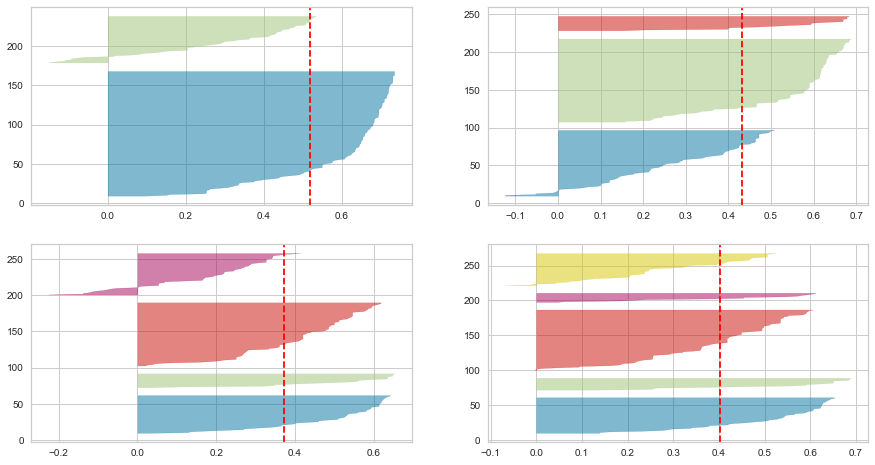

In [77]:
# Buscamos el número de clusters con Silhouette
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data11)

In [80]:
# Aplicamos un k-means de 5 cluster
kmeans = cluster.KMeans(n_clusters=5).fit(data11)
centroids = kmeans.cluster_centers_
print(centroids)

[[7.48663102e-01 7.44886364e-01 6.81250000e-01]
 [3.26797386e-01 6.38888889e-02 1.11022302e-16]
 [5.41927409e-01 5.05319149e-01 4.95744681e-01]
 [9.20814480e-01 9.06730769e-01 8.95192308e-01]
 [6.97478992e-01 6.21428571e-01 5.71428571e-02]]


Text(0.5, 0, 'SCORE3')

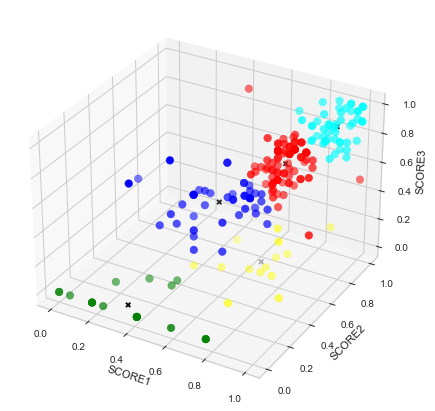

In [94]:
labels = kmeans.predict(data11)
colores=['red','green','blue','cyan', 'yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data11[:, 0], data11[:, 1], data11[:, 2], c=asignar,s=60)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', c='black')

ax.set_xlabel('SCORE1')
ax.set_ylabel('SCORE2')
ax.set_zlabel('SCORE3')

## Caso 12: Añadimos los cursos

In [101]:
# Conseguimos un df tal que cada fila representa un id
dicc = dict()
for id, curso, value in data1.reset_index(drop=False)[['ID', 'CURSO', 'SCORE']].values:
    if (id,curso) in dicc.keys():
        dicc[(id, curso)] += [value]
    else:
        dicc[(id, curso)] = [value]

for i in dicc.keys():
    while len(dicc[i]) < 3:
        dicc[i] += [0]

data12 = pd.DataFrame.from_dict(dicc, orient='index', columns=['SCORE1', 'SCORE2', 'SCORE3'])
data12['CURSO'] = [curso for id,curso in data12.reset_index(drop=False)['index'].values]
data12.reset_index(drop=False).head()

index  SCORE1  SCORE2  SCORE3  CURSO
0  (2213.0, 17/18)     8.0     6.5     3.0  17/18
1  (2215.0, 17/18)     8.5     7.5    10.0  17/18
2  (2217.0, 17/18)     6.0     6.0     7.0  17/18
3  (2218.0, 17/18)     8.5     7.5     8.5  17/18
4  (2219.0, 17/18)    10.0    10.0     5.0  17/18

In [ ]:
data12_test = data12.copy(deep=True)

In [102]:
# Binarizamos el curso
data12 = pd.concat((data12, pd.get_dummies(data12["CURSO"])), axis = 1).drop("CURSO", 1)
data12.head()

SCORE1  SCORE2  SCORE3  17/18  18/19  19/20
(2213.0, 17/18)     8.0     6.5     3.0      1      0      0
(2215.0, 17/18)     8.5     7.5    10.0      1      0      0
(2217.0, 17/18)     6.0     6.0     7.0      1      0      0
(2218.0, 17/18)     8.5     7.5     8.5      1      0      0
(2219.0, 17/18)    10.0    10.0     5.0      1      0      0

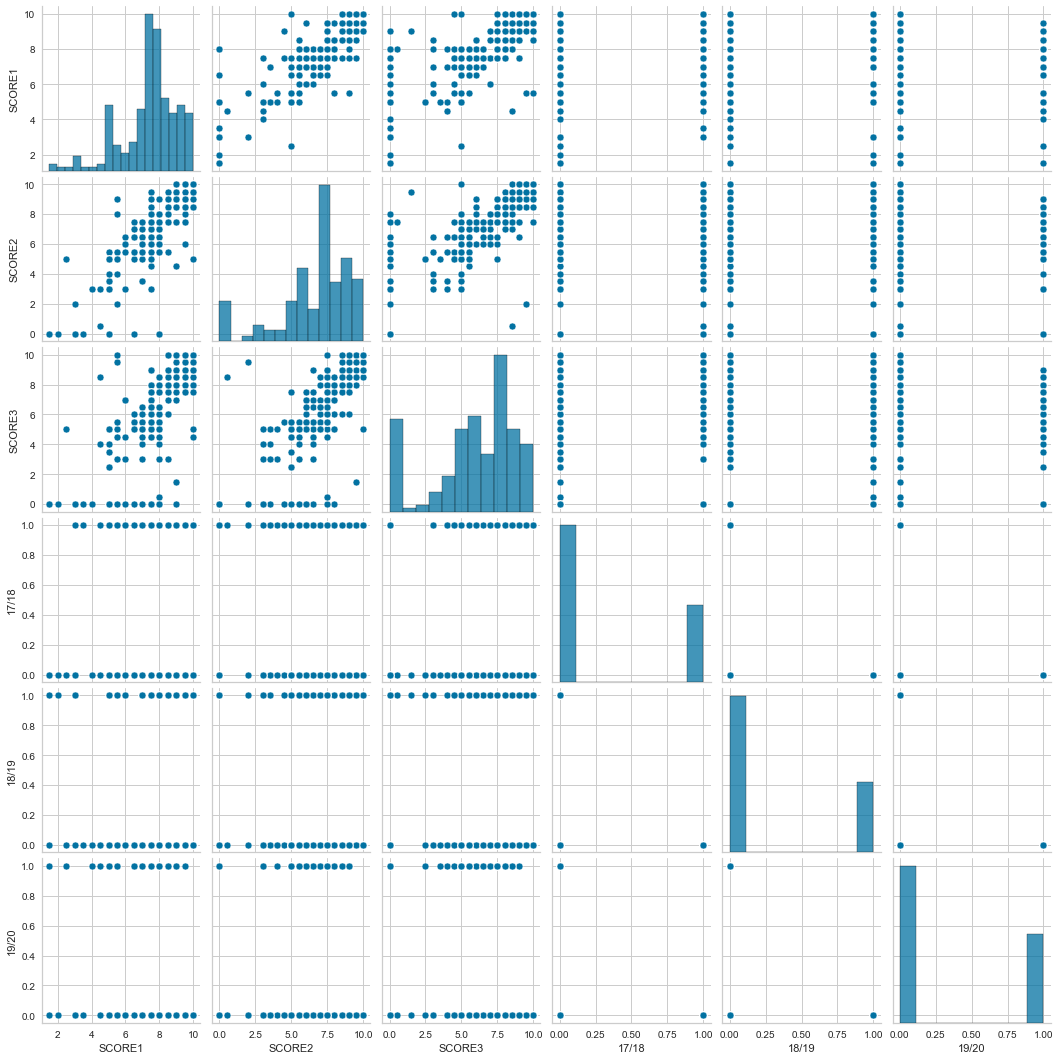

In [103]:
sns_plot12 = sns.pairplot(data12)
sns_plot12.savefig("out/caso1/pairplotCaso12.png")

In [104]:
# Normalizamos los datos
min_max_scaler = preprocessing.MinMaxScaler() 
data12 = min_max_scaler.fit_transform(data12)

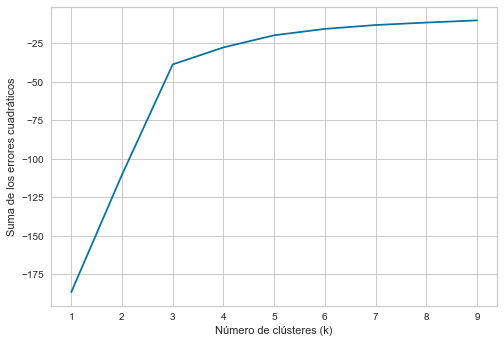

In [105]:
# Utilizando la suma de errores cuadráticos, extraemos el número de clusters
nc = range(1, 10)
kmeans = [cluster.KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(data12).score(data12) for i in range(len(kmeans))]

plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.savefig("out/caso1/codo2Caso1.png")
plt.plot(nc,score)

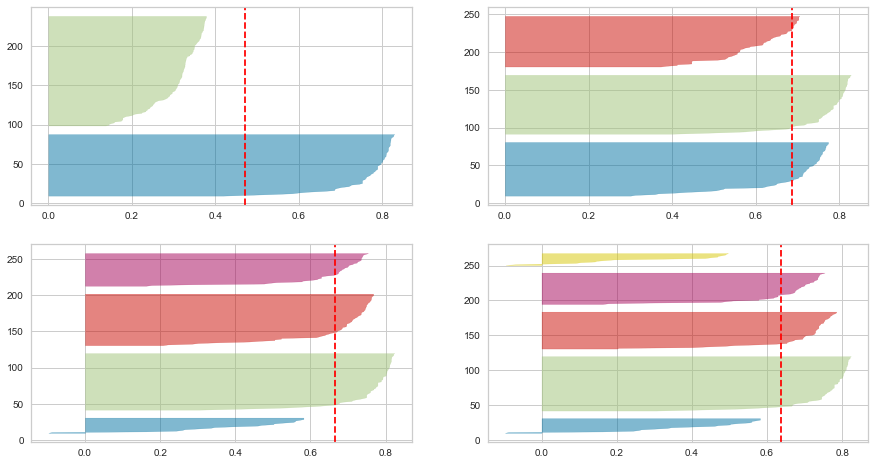

In [106]:
# Buscamos el número de clusters con Silhouette
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data12)

In [108]:
# Aplicamos un k-means de 3 cluster
kmeans = cluster.KMeans(n_clusters=3).fit(data12)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 7.90849673e-01  7.21527778e-01  7.03472222e-01  1.00000000e+00
  -3.33066907e-16 -4.99600361e-16]
 [ 6.47058824e-01  6.41139241e-01  5.70886076e-01 -2.77555756e-16
  -3.88578059e-16  1.00000000e+00]
 [ 6.88581315e-01  6.42647059e-01  5.12500000e-01 -1.11022302e-16
   1.00000000e+00 -4.44089210e-16]]


Text(0.5, 0, 'SCORE3')

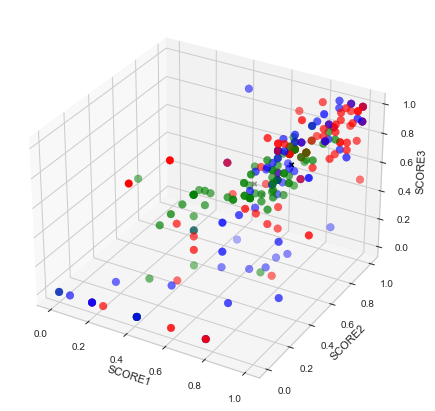

In [109]:
labels = kmeans.predict(data12)
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data12[:, 0], data12[:, 1], data12[:, 2], c=asignar,s=60)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', c='black')

ax.set_xlabel('SCORE1')
ax.set_ylabel('SCORE2')
ax.set_zlabel('SCORE3')

## Caso 13: Considerando DUF

In [113]:
# Conseguimos un df tal que cada fila representa un id
dicc = dict()
for id, value in data1.reset_index(drop=False)[['ID', 'SCORE']].values:
    if id in dicc.keys():
        dicc[id] += [value]
    else:
        dicc[id] = [value]

for i in dicc.keys():
    while len(dicc[i]) < 3:
        dicc[i] += [0]

data13 = pd.DataFrame.from_dict(dicc, orient='index', columns=['SCORE1', 'SCORE2', 'SCORE3'])
data13.head()

SCORE1  SCORE2  SCORE3
2213.0     8.0     6.5     3.0
2215.0     8.5     7.5    10.0
2217.0     6.0     6.0     7.0
2218.0     8.5     7.5     8.5
2219.0    10.0    10.0     5.0

In [110]:
# Conseguimos un df tal que cada fila representa un id
dicc = dict()
for id, value in data1.reset_index(drop=False)[['ID', 'DUF']].values:
    if id in dicc.keys():
        dicc[id] += [value]
    else:
        dicc[id] = [value]

for i in dicc.keys():
    while len(dicc[i]) < 3:
        dicc[i] += [0]

data13_DUF = pd.DataFrame.from_dict(dicc, orient='index', columns=['DUF1', 'DUF2', 'DUF3'])
data13_DUF.head()

DUF1  DUF2  DUF3
2213.0   0.0   0.0   0.0
2215.0   0.0   0.0   0.0
2217.0   1.0   2.0  34.0
2218.0   0.0   0.0   0.0
2219.0   0.0   0.0   0.0

In [117]:
# Concatenamos para conseguir el df total
data13 = data13.join(data13_DUF)
data13.head()

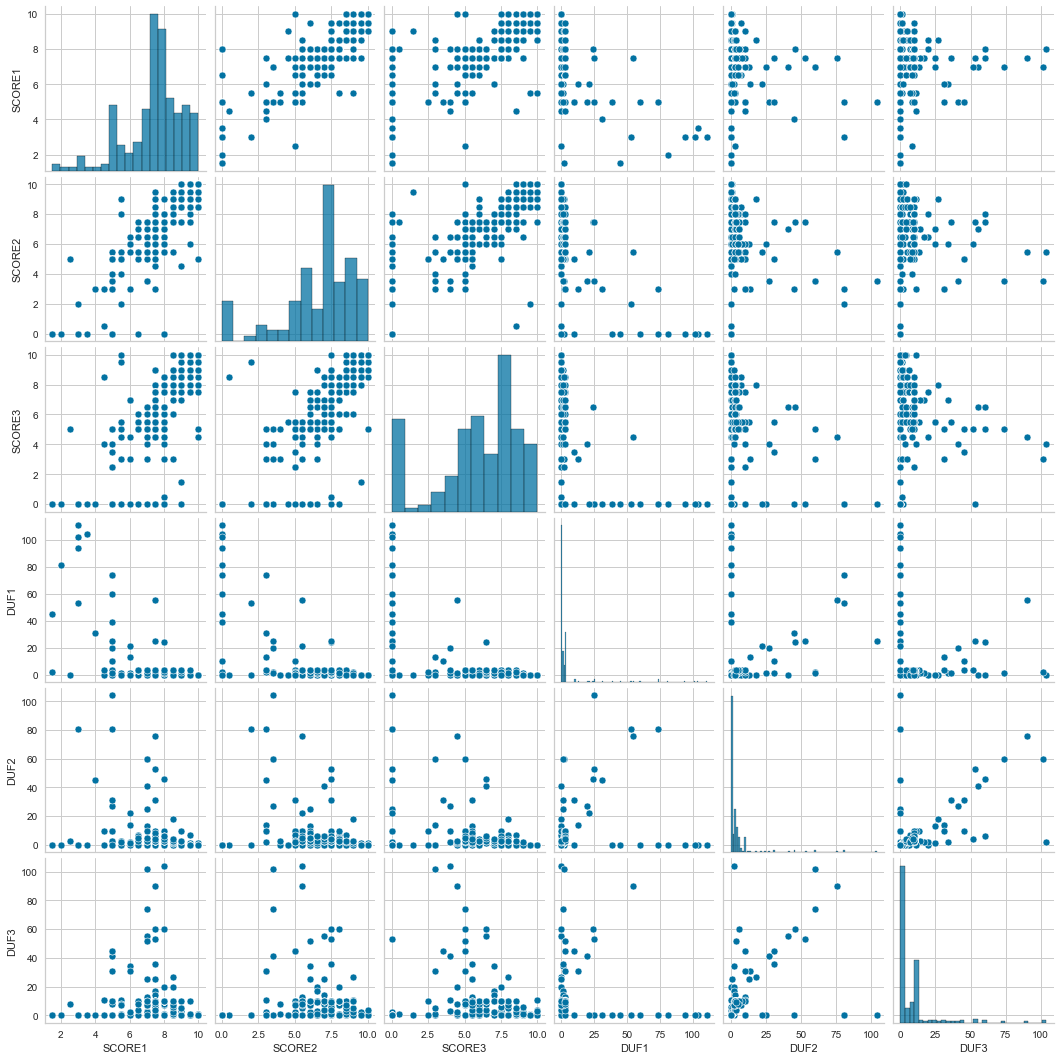

In [119]:
sns_plot13 = sns.pairplot(data13)
sns_plot13.savefig("out/caso1/pairplotCaso13.png")

In [120]:
# Normalizamos los datos
min_max_scaler = preprocessing.MinMaxScaler() 
data13 = min_max_scaler.fit_transform(data13)

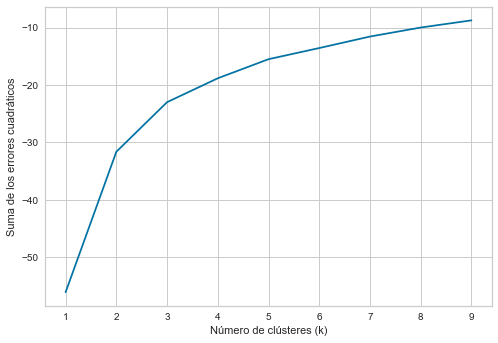

In [121]:
# Utilizando la suma de errores cuadráticos, extraemos el número de clusters
nc = range(1, 10)
kmeans = [cluster.KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(data13).score(data13) for i in range(len(kmeans))]

plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.savefig("out/caso1/codo2Caso1.png")
plt.plot(nc,score)

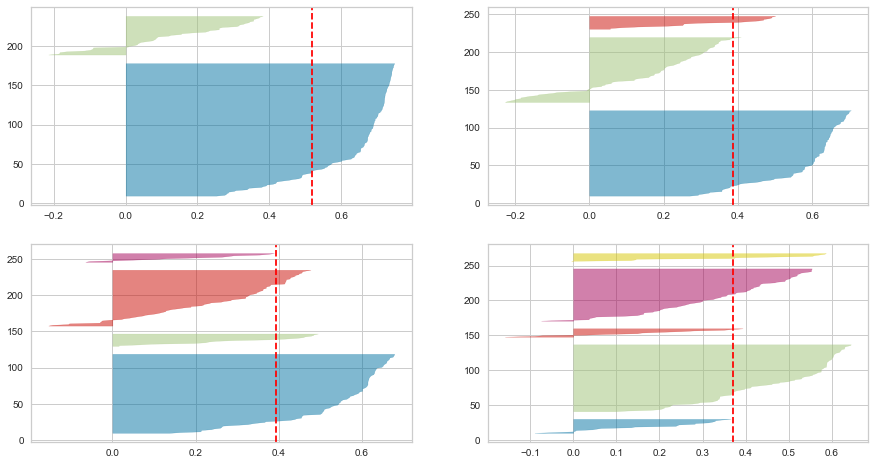

In [122]:
# Buscamos el número de clusters con Silhouette
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data13)

In [124]:
# Aplicamos un k-means de 5 cluster
kmeans = cluster.KMeans(n_clusters=5).fit(data13)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 6.28959276e-01  5.76923077e-01  4.42307692e-01  9.97920998e-02
   3.30621302e-01  6.04289941e-01]
 [ 8.50212250e-01  8.46391753e-01  8.34536082e-01  4.27231355e-03
   1.30848533e-02  3.12252181e-02]
 [ 2.20588235e-01  4.16666667e-02  2.22044605e-16  6.29879880e-01
   1.29807692e-01 -1.38777878e-17]
 [ 6.52476780e-01  6.28289474e-01  5.57236842e-01  1.14983404e-02
   3.26417004e-02  7.60374494e-02]
 [ 5.71428571e-01  4.02380952e-01  7.38095238e-02  4.80480480e-02
   1.16300366e-01  2.56410256e-02]]


Text(0.5, 0, 'SCORE3')

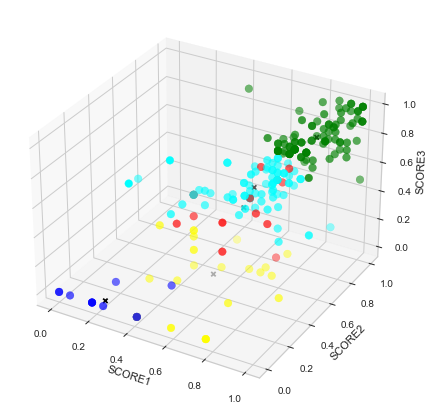

In [126]:
labels = kmeans.predict(data13)
colores=['red','green','blue', 'cyan', 'yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data13[:, 0], data13[:, 1], data13[:, 2], c=asignar,s=60)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', c='black')

ax.set_xlabel('SCORE1')
ax.set_ylabel('SCORE2')
ax.set_zlabel('SCORE3')

## Caso 14: Considerando SCORES y DUFS

In [128]:
# Conseguimos un df tal que cada fila representa un id
dicc = dict()
for id, curso, value in data1.reset_index(drop=False)[['ID', 'CURSO', 'SCORE']].values:
    if (id,curso) in dicc.keys():
        dicc[(id, curso)] += [value]
    else:
        dicc[(id, curso)] = [value]

for i in dicc.keys():
    while len(dicc[i]) < 3:
        dicc[i] += [0]

data14 = pd.DataFrame.from_dict(dicc, orient='index', columns=['SCORE1', 'SCORE2', 'SCORE3'])
data14['CURSO'] = [curso for id,curso in data14.reset_index(drop=False)['index'].values]
data14['ID'] = [id for id,curso in data14.reset_index(drop=False)['index'].values]
data14 = pd.concat((data14, pd.get_dummies(data14["CURSO"])), axis = 1).drop("CURSO", 1)
data14.head()

SCORE1  SCORE2  SCORE3      ID  17/18  18/19  19/20
(2213.0, 17/18)     8.0     6.5     3.0  2213.0      1      0      0
(2215.0, 17/18)     8.5     7.5    10.0  2215.0      1      0      0
(2217.0, 17/18)     6.0     6.0     7.0  2217.0      1      0      0
(2218.0, 17/18)     8.5     7.5     8.5  2218.0      1      0      0
(2219.0, 17/18)    10.0    10.0     5.0  2219.0      1      0      0

In [129]:
# Conseguimos un df tal que cada fila representa un id
dicc = dict()
for id, value in data1.reset_index(drop=False)[['ID', 'DUF']].values:
    if id in dicc.keys():
        dicc[id] += [value]
    else:
        dicc[id] = [value]

for i in dicc.keys():
    while len(dicc[i]) < 3:
        dicc[i] += [0]

data14_DUF = pd.DataFrame.from_dict(dicc, orient='index', columns=['DUF1', 'DUF2', 'DUF3'])
data14_DUF.head()

DUF1  DUF2  DUF3
2213.0   0.0   0.0   0.0
2215.0   0.0   0.0   0.0
2217.0   1.0   2.0  34.0
2218.0   0.0   0.0   0.0
2219.0   0.0   0.0   0.0

In [130]:
data14 = data14.reset_index(drop=True).set_index('ID').join(data14_DUF)
data14.head()

SCORE1  SCORE2  SCORE3  17/18  18/19  19/20  DUF1  DUF2  DUF3
ID                                                                   
2213.0     8.0     6.5     3.0      1      0      0   0.0   0.0   0.0
2215.0     8.5     7.5    10.0      1      0      0   0.0   0.0   0.0
2217.0     6.0     6.0     7.0      1      0      0   1.0   2.0  34.0
2218.0     8.5     7.5     8.5      1      0      0   0.0   0.0   0.0
2219.0    10.0    10.0     5.0      1      0      0   0.0   0.0   0.0

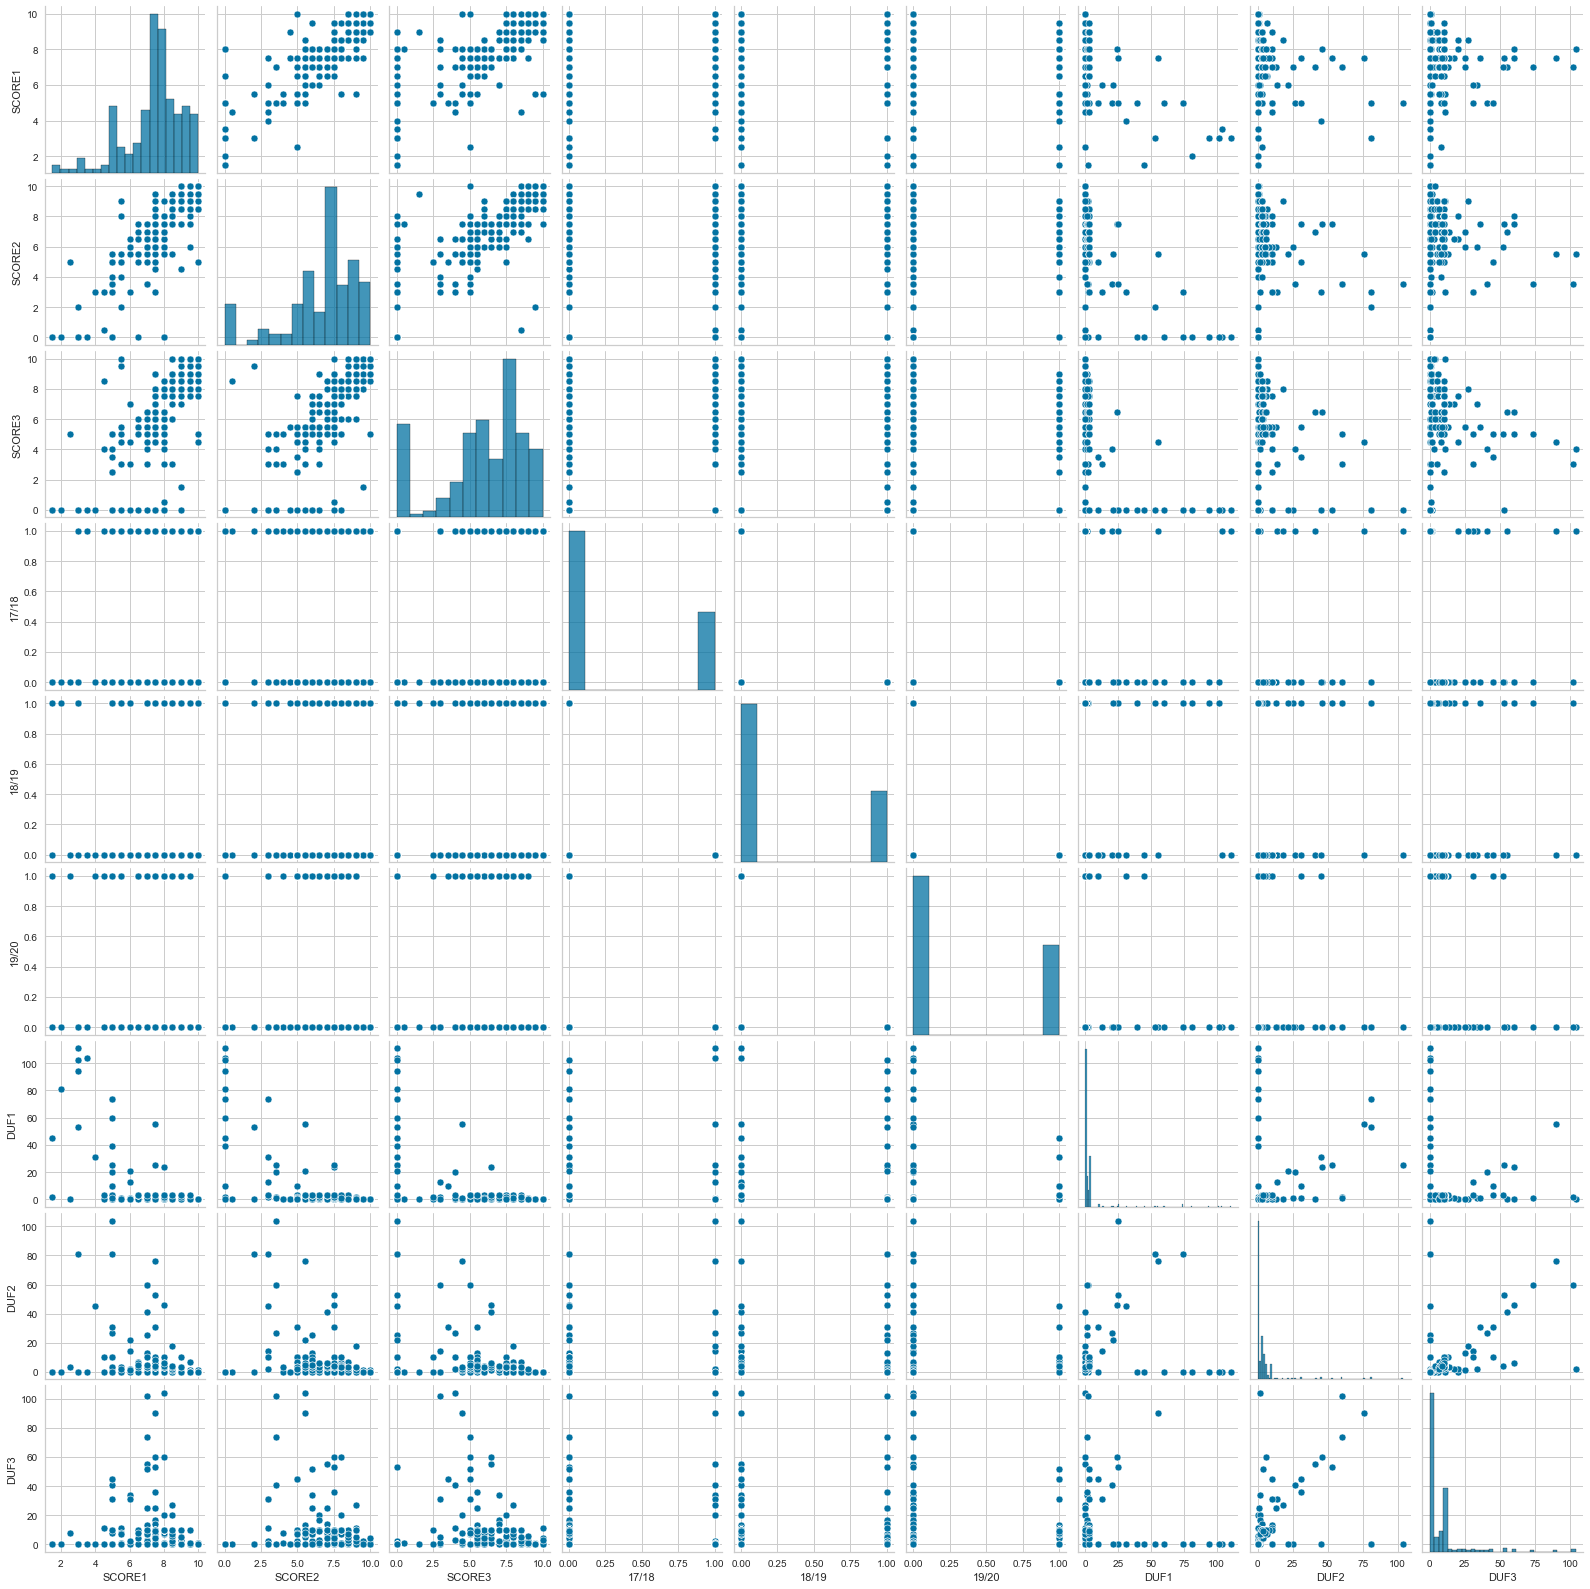

In [131]:
sns_plot14 = sns.pairplot(data14)
sns_plot14.savefig("out/caso1/pairplotCaso14.png")

In [132]:
# Normalizamos los datos
min_max_scaler = preprocessing.MinMaxScaler() 
data14 = min_max_scaler.fit_transform(data14)

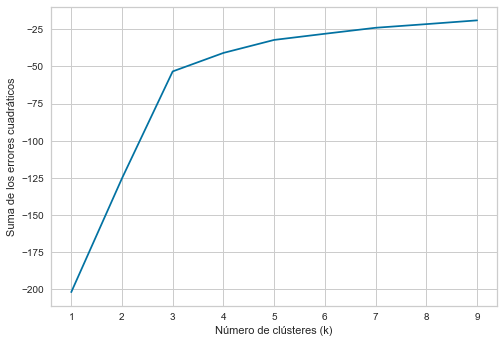

In [133]:
# Utilizando la suma de errores cuadráticos, extraemos el número de clusters
nc = range(1, 10)
kmeans = [cluster.KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(data14).score(data14) for i in range(len(kmeans))]

plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.savefig("out/caso1/codo2Caso1.png")
plt.plot(nc,score)

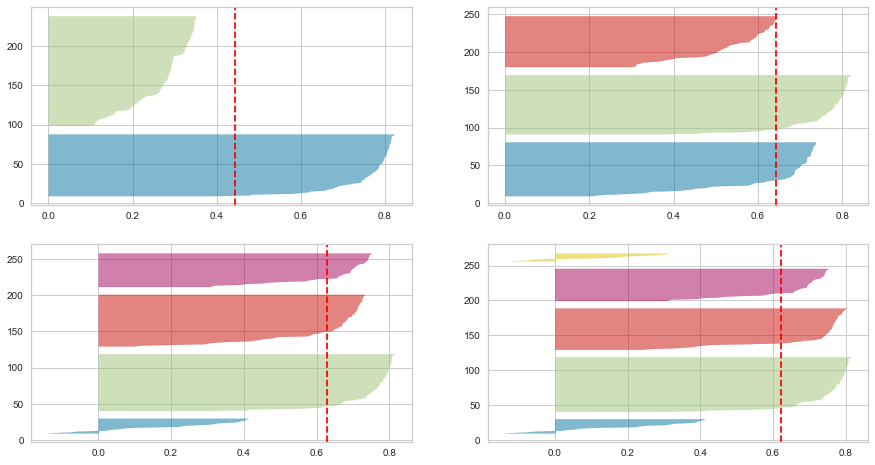

In [134]:
# Buscamos el número de clusters con Silhouette
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data14)

In [136]:
# Aplicamos un k-means de 5 cluster
kmeans = cluster.KMeans(n_clusters=3).fit(data14)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 6.88581315e-01  6.42647059e-01  5.12500000e-01 -1.11022302e-16
   1.00000000e+00 -4.44089210e-16  8.79703233e-02  7.28223982e-02
   7.67816742e-02]
 [ 7.90849673e-01  7.21527778e-01  7.03472222e-01  1.00000000e+00
  -3.33066907e-16 -4.99600361e-16  4.11661662e-02  3.92628205e-02
   5.84935897e-02]
 [ 6.47058824e-01  6.41139241e-01  5.70886076e-01 -2.77555756e-16
  -3.88578059e-16  1.00000000e+00  2.79393317e-02  5.40408958e-02
   9.83446933e-02]]


Text(0.5, 0, 'SCORE3')

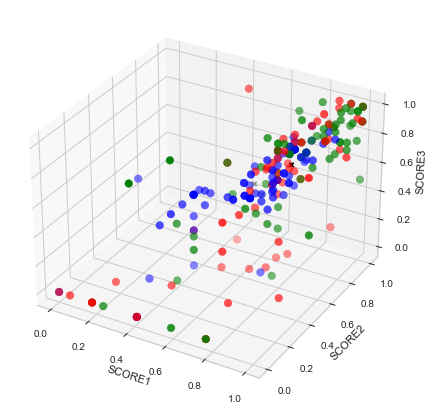

In [138]:
labels = kmeans.predict(data14)
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data14[:, 0], data14[:, 1], data14[:, 2], c=asignar,s=60)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', c='black')

ax.set_xlabel('SCORE1')
ax.set_ylabel('SCORE2')
ax.set_zlabel('SCORE3')

# Caso 2: Utilizando la media de cada estudiante de los 3 últimos meses

In [163]:
data2 = data2.replace(np.nan, 0)
data2['MONTH'] = [x.month for x in data2.DATE]
data2 = data2.groupby(['ID', 'CURSO'])['SCORE', 'MONTH', 'DUF'].apply(lambda x: x.groupby(['MONTH']).mean().head(3))
data2.head()

<ipython-input-163-6a044cedaab9>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data2 = data2.groupby(['ID', 'CURSO'])['SCORE', 'MONTH', 'DUF'].apply(lambda x: x.groupby(['MONTH']).mean().head(3))


## Caso 2.1: Utilizamos solamente el SCORE

In [170]:
len(data2.reset_index(drop=False)[['ID', 'SCORE']].values)

559

In [176]:
# Conseguimos un df tal que cada fila representa un id
dicc = dict()
for id, value in data2.reset_index(drop=False)[['ID', 'SCORE']].values:
    if id != 2:
        if id in dicc.keys():
            dicc[id] += [value]
        else:
            dicc[id] = [value]

for i in dicc.keys():
    while len(dicc[i]) < 3:
        dicc[i] += [0]

data21 = pd.DataFrame.from_dict(dicc, orient='index', columns=['SCORE1', 'SCORE2', 'SCORE3'])
data21.head()

SCORE1    SCORE2    SCORE3
2032.0   0.000  0.000000  0.000000
2213.0   0.000  1.666667  7.250000
2215.0   0.000  6.500000  5.600000
2217.0   4.000  5.000000  7.000000
2218.0   1.125  1.625000  1.071429

In [177]:
data21_test = data21.copy(deep=True)


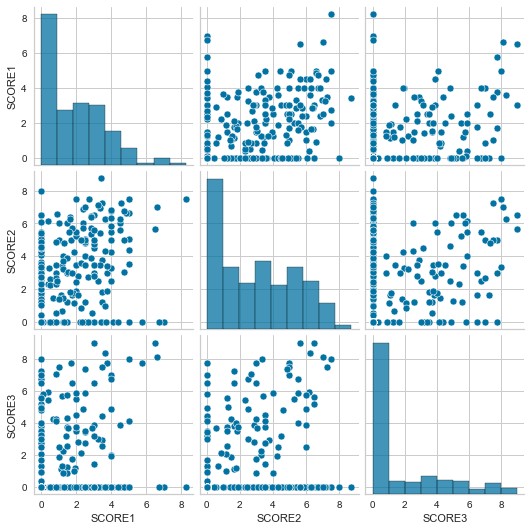

In [178]:
sns_plot21 = sns.pairplot(data21)
sns_plot21.savefig("out/caso1/pairplotCaso21.png")

In [179]:
# Normalizamos los datos
min_max_scaler = preprocessing.MinMaxScaler() 
data21 = min_max_scaler.fit_transform(data21)

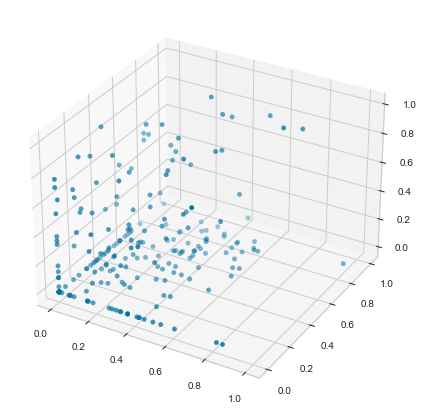

In [180]:
# Gráfico 3D para la dispersión
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data21[:, 0], data21[:, 1], data21[:, 2])

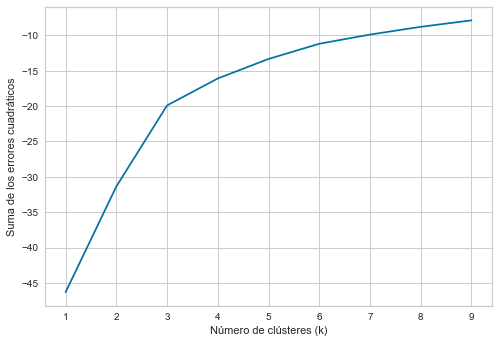

In [182]:
# Utilizando la suma de errores cuadráticos, extraemos el número de clusters
nc = range(1, 10)
kmeans = [cluster.KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(data21).score(data21) for i in range(len(kmeans))]

plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.savefig("out/caso1/codo2Caso1.png")
plt.plot(nc,score)

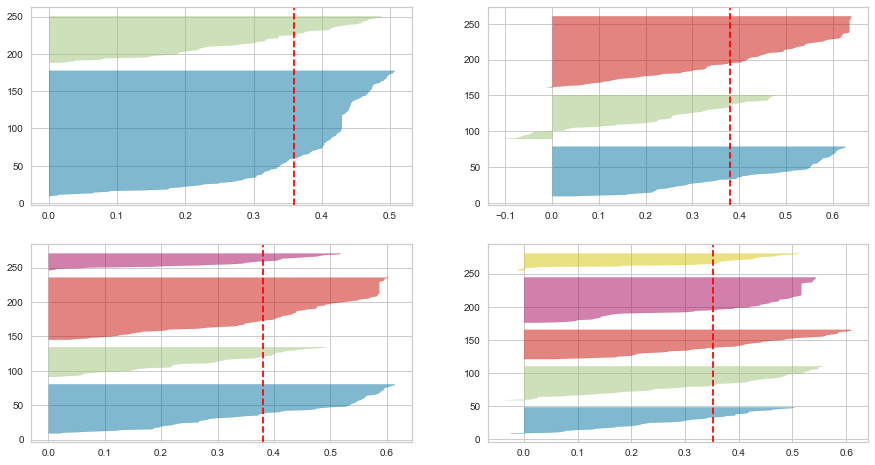

In [183]:
# Buscamos el número de clusters con Silhouette
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data21)

[[0.39445473 0.64372586 0.02896883]
 [0.17709281 0.04158156 0.02716677]
 [0.33208081 0.62076735 0.73354497]
 [0.07994228 0.40683809 0.02746713]
 [0.17023002 0.17441527 0.49765003]]


Text(0.5, 0, 'SCORE3')

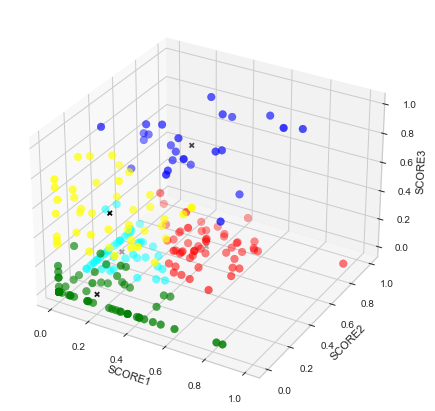

In [185]:
# Aplicamos un k-means de 5 cluster
kmeans = cluster.KMeans(n_clusters=5).fit(data21)
centroids = kmeans.cluster_centers_
print(centroids)

labels = kmeans.predict(data21)
colores=['red','green','blue','cyan', 'yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data21[:, 0], data21[:, 1], data21[:, 2], c=asignar,s=60)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', c='black')

ax.set_xlabel('SCORE1')
ax.set_ylabel('SCORE2')
ax.set_zlabel('SCORE3')

In [44]:
data1 = data1.reset_index(drop=False)[['CURSO', 'SCORE', 'DUF']]
data1.head()

CURSO  SCORE  DUF
0  17/18    8.0    0
1  17/18    6.5    0
2  17/18    3.0    0
3  17/18    8.5    0
4  17/18    7.5    0

In [45]:
data_testing = data1

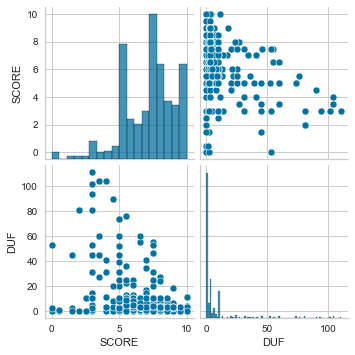

In [46]:
# Distribución de los datos:
fig = px.box(data1, x="CURSO", y="SCORE", color="CURSO", title="Diagrama de cajas de los resultados por cursos")
fig.write_image("out/caso1/boxplotCaso1.png")

fig2 = px.histogram(data1, x="SCORE", title="Distribución de las notas")
fig2.write_image("out/caso1/histScoreCaso1.png")

fig3 = px.histogram(data1, x="DUF", title = "Distribución de la diferencia en días hasta el último examen")
fig3.write_image("out/caso1/histDUFCaso1.png")

sns_plot = sns.pairplot(data1)
sns_plot.savefig("out/caso1/pairplotCaso1.png")

fig.show()
fig2.show()
fig3.show()
sns_plot


Preparamos los datos para la aplicación del método

In [47]:
data1 = pd.concat((data1, pd.get_dummies(data1["CURSO"])), axis = 1).drop("CURSO", 1)
data1.head()

SCORE  DUF  17/18  18/19  19/20
0    8.0    0      1      0      0
1    6.5    0      1      0      0
2    3.0    0      1      0      0
3    8.5    0      1      0      0
4    7.5    0      1      0      0

In [48]:
# Normalizamos los datos
min_max_scaler = preprocessing.MinMaxScaler() 
data1 = min_max_scaler.fit_transform(data1)
data1

array([[0.8       , 0.        , 1.        , 0.        , 0.        ],
       [0.65      , 0.        , 1.        , 0.        , 0.        ],
       [0.3       , 0.        , 1.        , 0.        , 0.        ],
       ...,
       [0.75      , 0.02702703, 0.        , 0.        , 1.        ],
       [0.75      , 0.03603604, 0.        , 0.        , 1.        ],
       [0.55      , 0.08108108, 0.        , 0.        , 1.        ]])

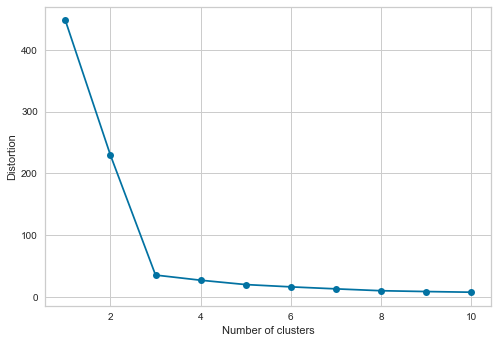

In [49]:
# Opción 1: Utilizando la inertia y extrayendo el número de grupos óptimos (k=3)
X = np.array(data1)
distortions = []

for i in range(1, 11):
    km = cluster.KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.savefig("out/caso1/codo1Caso1.png")
plt.show()

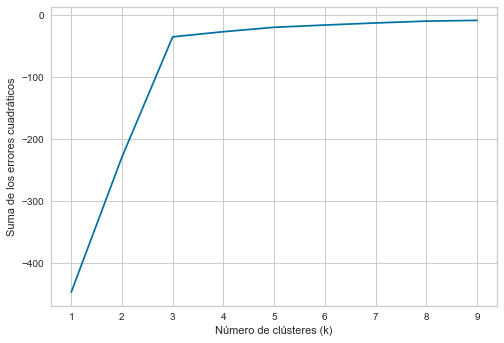

In [50]:
# Opción 2: Utilizando la suma de errores cuadráticos
nc = range(1, 10)
kmeans = [cluster.KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(data1).score(data1) for i in range(len(kmeans))]

plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.savefig("out/caso1/codo2Caso1.png")
plt.plot(nc,score)

In [51]:
# Aplicamos un k-means de 3 cluster
kmeans = cluster.KMeans(n_clusters=3).fit(data1)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 7.77884615e-01  4.59546085e-02  1.00000000e+00 -8.88178420e-16
   2.77555756e-16]
 [ 6.56739130e-01  5.86368978e-02  3.88578059e-16 -5.55111512e-16
   1.00000000e+00]
 [ 7.10220994e-01  8.57100194e-02  2.77555756e-16  1.00000000e+00
   3.33066907e-16]]


In [52]:
labels = kmeans.predict(data1)
data_testing['label'] = labels

In [53]:
data_testing[data_testing.label==0].CURSO.unique()

array(['17/18'], dtype=object)

In [54]:
data_testing.insert(loc=0, column = 'LABELS2', value = labels)

Comprobamos con el criterio del silhouette

In [55]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Instantiate the KMeans models
#
km = KMeans(n_clusters=3, random_state=42)
#
# Fit the KMeans model
#
km.fit_predict(data1)
#
# Calculate Silhoutte Score
#
score = silhouette_score(data1, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.832


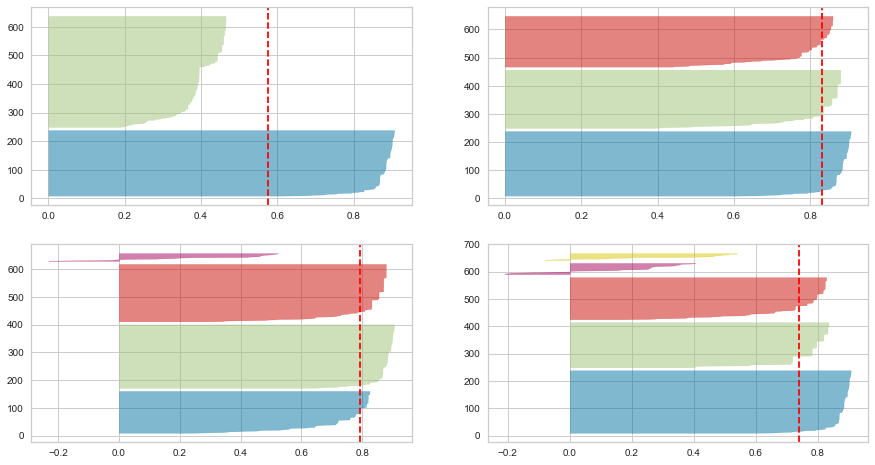

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data1)